# Applying Machine Learning Model: Neural Network
On the previous phases, we cleaned and pre-processed our data in order to prepare for this phase. Now let's start building a support vector classifier model to predict which employee will stay or leave the company.

## Importing the Preprocessed Dataset
Let's start by loading the preprocessed dataset from the previous phase into a `Pandas.DataFrame` then convert it to plain `Numpy.ndarray`.

In [1]:
# Import the Features and Targets
import pandas as pd
import numpy as np
import seaborn as sns

X_train = pd.read_csv("../dataset/preprocessed/Features_Training_Set.csv", index_col=0).to_numpy()
X_test = pd.read_csv("../dataset/preprocessed/Features_Testing_Set.csv", index_col=0).to_numpy()
y_train = pd.read_csv("../dataset/preprocessed/Target_Training_Set.csv", index_col=0).to_numpy().ravel()
y_test = pd.read_csv("../dataset/preprocessed/Target_Testing_Set.csv", index_col=0).to_numpy().ravel()

## Build the Neural Network Model
Next, we will build the architecture of our model using `tensorflow.keras`. Our model will have 500 input units on the first layer, two hidden layers with 500 units each, and one output layer with one unit. From the input layer upto the last hidden layer, we will use the *rectified linear unit function (RELU)* as an activation function, then, since this is a classification problem, we will use the sigmoid function as the activation function of the output layer.

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=500, activation="relu", input_shape=(24,)))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=500, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               12500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 514,001
Trainable params: 514,001
Non-trainable params: 0
_________________________________________________________________


## Compile and Train the Model
Once the model architecture was built, we need to compile them. Once compiled we immediately train our neural network with our training set.

In [4]:
model.compile(
  optimizer="Adam",
  loss="binary_crossentropy",
  metrics=['accuracy']
)

In [5]:
# After training, we can also save the history of model's metrics per epoch.
epoch_hists = model.fit(X_train, y_train, epochs=29, batch_size=50)

Epoch 1/29
40/40 [==============================] - 1s 6ms/step - loss: 0.5978 - accuracy: 0.6790
Epoch 2/29
40/40 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.7880
Epoch 3/29
40/40 [==============================] - 0s 6ms/step - loss: 0.3767 - accuracy: 0.8372
Epoch 4/29
40/40 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.8717
Epoch 5/29
40/40 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.8889
Epoch 6/29
40/40 [==============================] - 0s 6ms/step - loss: 0.1905 - accuracy: 0.9275
Epoch 7/29
40/40 [==============================] - 0s 6ms/step - loss: 0.1239 - accuracy: 0.9604
Epoch 8/29
40/40 [==============================] - 0s 6ms/step - loss: 0.1121 - accuracy: 0.9665
Epoch 9/29
40/40 [==============================] - 0s 6ms/step - loss: 0.0610 - accuracy: 0.9828
Epoch 10/29
40/40 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.9924
Epoch 11/29
40/40 [

## Making predictions
Our output layer will return a value between 0 to 1. This output is the probability that an employee is about to leave the company. To make binary predictions, we define a threshold of `0.5`. If the predicted probability is less than 50%, we classify it as `0` (stayed) or else, we classify it as `1`(left). 

In [6]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

16/16 [==============================] - 0s 3ms/step


## Visualizing the Training Epochs
Now, let's see how many epochs will it take before the model achieves maximum accuracy.

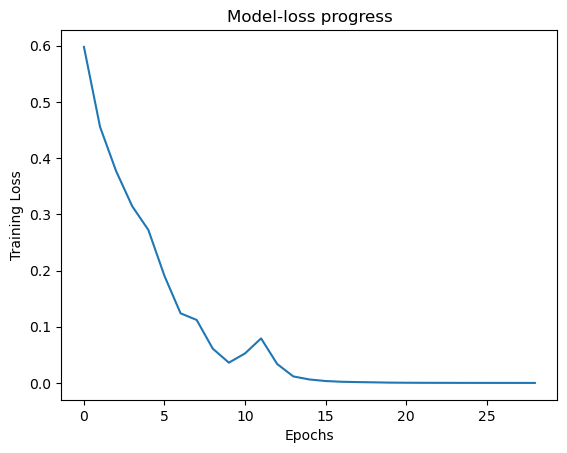

In [7]:
sns.lineplot(epoch_hists.history["loss"]).set(title="Model-loss progress", xlabel="Epochs", ylabel="Training Loss");

### Model Loss
It can be seen on the above visualization that around 20-epochs, our model already achieves minimum loss during training.

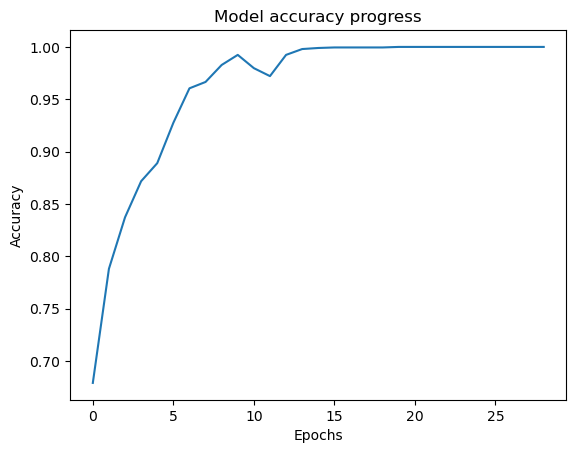

In [8]:
sns.lineplot(epoch_hists.history["accuracy"]).set(title="Model accuracy progress", xlabel="Epochs", ylabel="Accuracy");

### Model Accuracy
It can be seen on the above visualization that around 20-epochs, our model already achieves maximum loss during training.

## Evaluating the Model
After training and prediction, let's see how our model performs. Since our target variable `Attrition` only contains two values, we could categorize this machine learning problem as a *classification* problem. Thus we will be using *accuracy*, *precision*, *recall*, and *f1* score. We will also view the confusion matrix to quantify the amoun of correct and incorrect prediction of the model.

In [9]:
# Show the metrics of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

RESULTS_BASELINE = pd.DataFrame({
  "Metric": ["Accuracy", "Precision", "Recall", "F1"],
  "Value": [metric(y_true=y_test, y_pred=y_pred) for metric in [accuracy_score, precision_score, recall_score, f1_score]]
})

RESULTS_BASELINE.to_csv("../dataset/model-results/NeuralNetwork1.csv")

RESULTS_BASELINE

,Metric,Value
0,Accuracy,0.943320
1,Precision,0.914062
2,Recall,0.975000
3,F1,0.943548


### Model Accuracy
based on the results above, our model was able to correctly predict 93.31% of the testing set. This is a very small improvement compared to 92.71% accuracy of random forest classifier model.

### Model Precision
Out of all the employees predicted to leave the company, only 89.96% of them actually left the company. This is a little worse compared to 96.78% precision of random forest classifier model.

### Model Recall
Out of all the predicted employees, 97.10% of them left the company. This is a big improvement from 87.91% recall of random forest classifier model.

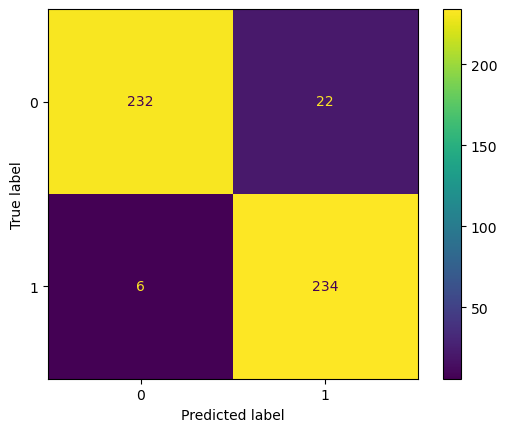

In [10]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
heatmap = ConfusionMatrixDisplay(confusion_matrix=cm)
heatmap.plot();

In [11]:
# Show the classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       254
           1       0.91      0.97      0.94       240

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.95      0.94      0.94       494



## Closing
In this section, we are able to generate a neural network model, asses it, and compare with random forest classifier model. Without any optimization on the model, we are able to achieve a low overall accuracy, precision, and recall. If we want to improve the capability to predict which employees were about to leave the company, we can either (1) conduct feature engineering on our dataset, (2) optimize our model, (3) try out other algorithms. Once we are able to decide which model to use, we will proceed to the next phase which is model understanding.